# Movie recommendation system

- **Movie_ID**: Unique identifier for each movie.
- **Movie_Title**: Title of the movie.
- **Movie_Genre**: Genre(s) of the movie (e.g., Action, Drama).
- **Movie_Language**: Primary language in which the movie was released.
- **Movie_Budget**: Budget allocated for the production of the movie.
- **Movie_Popularity**: Popularity score based on various metrics.
- **Movie_Release_Date**: Official release date of the movie.
- **Movie_Revenue**: Total earnings/revenue generated by the movie.
- **Movie_Runtime**: Duration of the movie in minutes.
- **Movie_Vote**: Average rating score given by viewers.
- **Movie_Vote_Count**: Total number of votes received by the movie.
- **Movie_Homepage**: Official website/homepage of the movie.
- **Movie_Keywords**: Keywords describing themes or key elements of the movie.
- **Movie_Overview**: Short summary or synopsis of the movie.
- **Movie_Production_House**: Company or studio that produced the movie.
- **Movie_Production_Country**: Country where the movie was produced.
- **Movie_Spoken_Language**: Language(s) spoken in the movie.
- **Movie_Tagline**: Promotional tagline or slogan for the movie.
- **Movie_Cast**: List of main actors and actresses in the movie.
- **Movie_Crew**: List of key crew members involved in the movie's production.
- **Movie_Director**: Director of the movie.


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,r2_score
import warnings

In [3]:
# Load Dataset
df=pd.read_csv("movies_data.csv")
df.shape


(4760, 21)

In [4]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

In [5]:
# see first five rows
df.head(3)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [6]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

# Missing Values

In [8]:
df.isnull().sum()

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64

In [9]:
# by percentage and ascending order
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Movie_Homepage              64.306723
Movie_Tagline               17.184874
Movie_Keywords               8.130252
Movie_Cast                   0.567227
Movie_Director               0.462185
Movie_Overview               0.063025
Movie_Runtime                0.042017
Movie_Budget                 0.000000
Movie_Title                  0.000000
Movie_ID                     0.000000
Movie_Language               0.000000
Movie_Genre                  0.000000
Movie_Popularity             0.000000
Movie_Vote                   0.000000
Movie_Vote_Count             0.000000
Movie_Release_Date           0.000000
Movie_Revenue                0.000000
Movie_Spoken_Language        0.000000
Movie_Production_Country     0.000000
Movie_Production_House       0.000000
Movie_Crew                   0.000000
dtype: float64

# Handle Missing Values 

> we are going to drop the columns with more than 50% missing values  and fill missing values with mode if column is categorical or fill with mean/median if column is numeric

In [10]:
# drop the Movie_Homepage column because it is npt neccessary for our analysis and cntains a lot of null values
df.drop(columns=['Movie_Homepage'], inplace=True)

> we use ravel() to convert 2D array to 1D array

In [11]:

# fill missing values using machine learning
from sklearn.impute import SimpleImputer
# call the imputer for numeric columns
imputer=SimpleImputer(strategy='mean')
# fill missing values in the Movie_Runtime column with mean value of the column
df['Movie_Runtime']=imputer.fit_transform(df[['Movie_Runtime']])


# call the imputer for categorical columns
imputer_2 = SimpleImputer(strategy='most_frequent')

# fill missing values in selected columns
df['Movie_Keywords'] = imputer_2.fit_transform(df[['Movie_Keywords']]).ravel()
df['Movie_Director'] = imputer_2.fit_transform(df[['Movie_Director']]).ravel()
df['Movie_Cast'] = imputer_2.fit_transform(df[['Movie_Cast']]).ravel()
df['Movie_Overview'] = imputer_2.fit_transform(df[['Movie_Overview']]).ravel()
df['Movie_Tagline'] = imputer_2.fit_transform(df[['Movie_Tagline']]).ravel()

# Check missing values
print(df.isnull().sum())

Movie_ID                    0
Movie_Title                 0
Movie_Genre                 0
Movie_Language              0
Movie_Budget                0
Movie_Popularity            0
Movie_Release_Date          0
Movie_Revenue               0
Movie_Runtime               0
Movie_Vote                  0
Movie_Vote_Count            0
Movie_Keywords              0
Movie_Overview              0
Movie_Production_House      0
Movie_Production_Country    0
Movie_Spoken_Language       0
Movie_Tagline               0
Movie_Cast                  0
Movie_Crew                  0
Movie_Director              0
dtype: int64


# Correlation Matrix 

['Movie_Budget', 'Movie_Popularity', 'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count']


Text(0.5, 1.0, 'Correlation Matrix of Numeric Features')

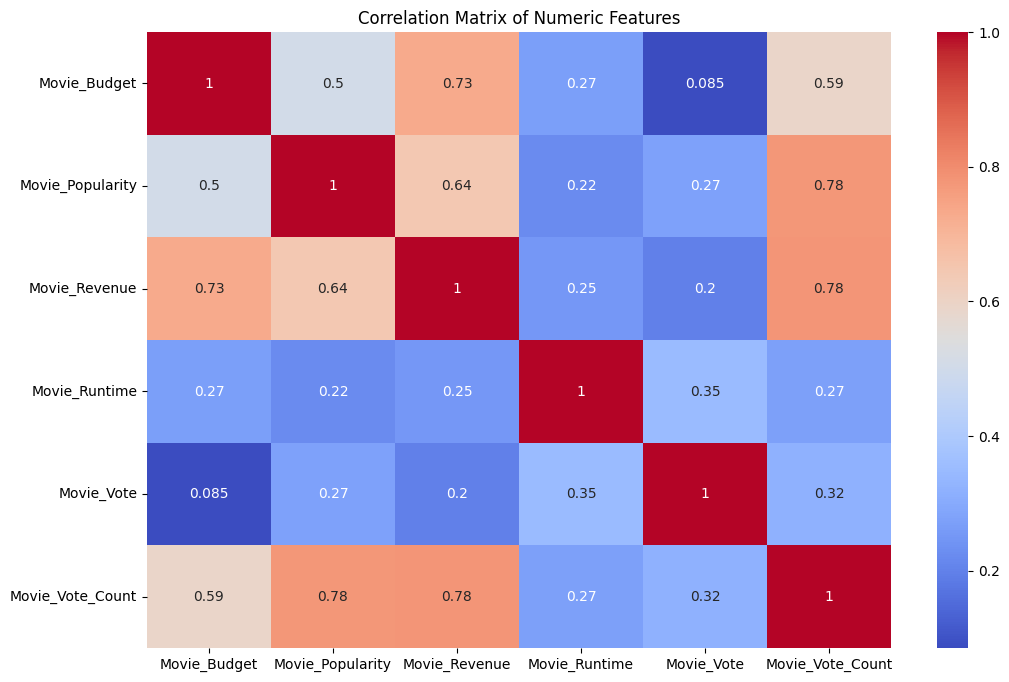

In [12]:
# take numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('Movie_ID')  # remove the 'Movie_ID' column if it's numeric
print(numeric_columns)

# Let' see correlation between numeric columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')

> Key Findings: We can see there is high positive correlation of Movie_Popularity and Movie_Vote_Count and Movie_Revenue and Movie_Budget.

# Before we start our analysis, we need to check the some columns separately to see if they contain any outlier or inconsistencies 

In [13]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Keywords', 'Movie_Overview', 'Movie_Production_House',
       'Movie_Production_Country', 'Movie_Spoken_Language', 'Movie_Tagline',
       'Movie_Cast', 'Movie_Crew', 'Movie_Director'],
      dtype='object')

# Movie Genres 

In [14]:
df['Movie_Genre'].unique()

array(['Crime Comedy', 'Adventure Action Science Fiction',
       'Animation Family', ..., 'Romance Action',
       'History Drama War Action',
       'Action Adventure Animation Family Fantasy'],
      shape=(1164,), dtype=object)

In [15]:
df['Movie_Genre'].value_counts()

Movie_Genre
Drama                                            368
Comedy                                           282
Drama Romance                                    164
Comedy Romance                                   143
Comedy Drama                                     142
                                                ... 
Science Fiction Comedy                             1
Horror Crime Thriller                              1
Action Adventure Drama Horror Science Fiction      1
War Action Drama History Thriller                  1
Thriller Mystery Drama Crime                       1
Name: count, Length: 1164, dtype: int64

In [16]:
# Convert all genre strings into lists
df['Movie_Genre_List'] = df['Movie_Genre'].str.split()


In [17]:
from collections import Counter

# Flatten the list of all genres
genre_counts = Counter(genre for sublist in df['Movie_Genre_List'].dropna() for genre in sublist)

# Top 15 most common genres
top_genres = [genre for genre, count in genre_counts.most_common(15)]
print(top_genres)


['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure', 'Crime', 'Science', 'Fiction', 'Horror', 'Family', 'Fantasy', 'Mystery', 'Animation', 'History']


In [18]:
df['Movie_Genre_List'].value_counts()

Movie_Genre_List
[Drama]                                                 368
[Comedy]                                                282
[Drama, Romance]                                        164
[Comedy, Romance]                                       143
[Comedy, Drama]                                         142
                                                       ... 
[Science, Fiction, Comedy]                                1
[Horror, Crime, Thriller]                                 1
[Action, Adventure, Drama, Horror, Science, Fiction]      1
[War, Action, Drama, History, Thriller]                   1
[Thriller, Mystery, Drama, Crime]                         1
Name: count, Length: 1164, dtype: int64

In [19]:
# Select only the first genre from the list
df['Movie_Genre'] = df['Movie_Genre_List'].apply(lambda x: x[0] if isinstance(x, list) else '')
df['Movie_Genre'].value_counts()

Movie_Genre
Drama          1203
Comedy         1041
Action          750
Adventure       338
Horror          298
Crime           194
Thriller        194
Animation       123
Fantasy         116
Romance         106
Science          96
Documentary      89
Family           56
Mystery          41
Music            33
Western          27
History          25
War              24
TV                4
Foreign           2
Name: count, dtype: int64

> In the above code, we first convert the genre strings into lists using the str.split() method. Then, we use the Counter class from the collections module to count the occurrences of each genre across all movies. Finally, we extract the top 15 most common genres and print them out.

# Movie Title  

In [20]:
df['Movie_Title'].nunique(), df['Movie_Title'].shape[0]

(4757, 4760)

> Above code is showing that there are only 3 movie_titles which are same or duplicate in the dataset

In [21]:
df['Movie_Title'].mode(0)

0             Batman
1    Out of the Blue
2           The Host
Name: Movie_Title, dtype: object

> These are movie titles which comes twice in the dataset.

In [22]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Keywords', 'Movie_Overview', 'Movie_Production_House',
       'Movie_Production_Country', 'Movie_Spoken_Language', 'Movie_Tagline',
       'Movie_Cast', 'Movie_Crew', 'Movie_Director', 'Movie_Genre_List'],
      dtype='object')

# Movie Language

| Code | Language         |
|------|------------------|
| en   | English          |
| de   | German           |
| es   | Spanish          |
| zh   | Chinese          |
| ja   | Japanese         |
| da   | Danish           |
| it   | Italian          |
| sv   | Swedish          |
| hi   | Hindi            |
| ru   | Russian          |
| pt   | Portuguese       |
| ko   | Korean           |
| af   | Afrikaans        |
| fr   | French           |
| ro   | Romanian         |
| nl   | Dutch            |
| ar   | Arabic           |
| he   | Hebrew           |
| th   | Thai             |
| cn   | Chinese (non-standard; same as zh) |
| tr   | Turkish          |
| cs   | Czech            |
| fa   | Persian (Farsi)  |
| no   | Norwegian        |
| ps   | Pashto           |
| vi   | Vietnamese       |
| el   | Greek            |
| hu   | Hungarian        |
| nb   | Norwegian Bokmål |
| xx   | Unknown/Other    |
| id   | Indonesian       |
| pl   | Polish           |
| is   | Icelandic        |
| te   | Telugu           |
| ta   | Tamil            |
| ky   | Kyrgyz           |
| sl   | Slovenian        |


In [23]:
df['Movie_Language'].unique()

array(['en', 'de', 'es', 'zh', 'ja', 'da', 'it', 'sv', 'hi', 'ru', 'pt',
       'ko', 'af', 'fr', 'ro', 'nl', 'ar', 'he', 'th', 'cn', 'tr', 'cs',
       'fa', 'no', 'ps', 'vi', 'el', 'hu', 'nb', 'xx', 'id', 'pl', 'is',
       'te', 'ta', 'ky', 'sl'], dtype=object)

In [24]:
lang_counts = df['Movie_Language'].value_counts()
rare_langs = lang_counts[lang_counts < 5].index

# Replace rare languages with 'Other'
df['Movie_Language'] = df['Movie_Language'].apply(lambda x: 'Other' if x in rare_langs else x)
#  let make 

> We have replaced rare languages with 'Other' in the 'Movie_Language' column. Now, let's check the value counts again to confirm the changes.

> **Movie Spoken Language** column is simillar to **Movie Language** column so we have to drop **Movie Spoken Language** column

In [25]:
# drop movie spoken language column
df.drop(columns=['Movie_Spoken_Language'], inplace=True)

# Movie Budget

In [26]:
df['Movie_Budget'].head()

0     4000000
1    11000000
2    94000000
3    55000000
4    15000000
Name: Movie_Budget, dtype: int64

In [27]:
print(f"The minimum budget is {df['Movie_Budget'].min()} and the maximum budget is {df['Movie_Budget'].max()}")
print(f"The average budget is {df['Movie_Budget'].mean()}")

The minimum budget is 0 and the maximum budget is 380000000
The average budget is 29201287.084033612


> we have some values which are showing budget  zero it is not possible, may be these are movies having low budget and filled with zero, so we have to fill this with q1  

In [28]:
# Calculate Q1 (25th percentile of non-zero budgets)
q1 = df[df['Movie_Budget'] != 0]['Movie_Budget'].quantile(0.25)

# Replace 0 with Q1
df['Movie_Budget'] = df['Movie_Budget'].replace(0, q1)
print("Operation completed")

Operation completed


# Add Profit Column

In [29]:
df['Movie_profit'] = df['Movie_Revenue'] - df['Movie_Budget']

# Movie Production Country Name 

In [30]:
df['Movie_Production_Country'].head(6)

0    [{"iso_3166_1": "US", "name": "United States o...
1    [{"iso_3166_1": "US", "name": "United States o...
2    [{"iso_3166_1": "US", "name": "United States o...
3    [{"iso_3166_1": "US", "name": "United States o...
4    [{"iso_3166_1": "US", "name": "United States o...
5    [{"iso_3166_1": "AR", "name": "Argentina"}, {"...
Name: Movie_Production_Country, dtype: object

In [31]:
import ast

def extract_country_names(value):
    # Convert the string representation of a list to an actual list of dictionaries
    if isinstance(value, str):
        try:
            value = ast.literal_eval(value)  # Convert string to list of dicts
        except Exception as e:
            return f"Error: {e}"  # In case there's an issue, return the error
    
    # Now, check if it's a list of dictionaries
    if isinstance(value, list):
        return ', '.join([d['name'] for d in value if isinstance(d, dict) and 'name' in d])  # Extract country names
    return ''  # If not a valid list, return an empty string

# Apply the function to clean the column
df['Production_Country_Name'] = df['Movie_Production_Country'].apply(extract_country_names)


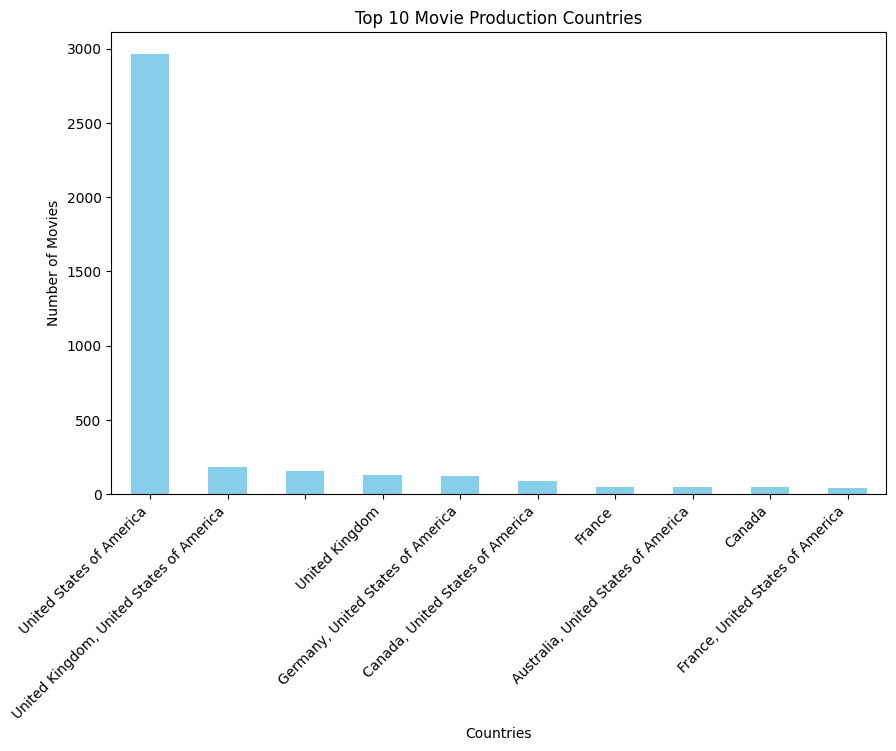

In [32]:
# Get the top 10 countries (or combinations of countries) by production count
top_countries = df['Production_Country_Name'].value_counts().head(10)

# Plot the top 10
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Production Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


# check Movie Release Date column

In [33]:
df['Movie_Release_Date'] = pd.to_datetime(df['Movie_Release_Date'], errors='coerce')
# Extract the year, month, and day
df['Release_Year'] = df['Movie_Release_Date'].dt.year
df['Release_Month'] = df['Movie_Release_Date'].dt.month
df['Release_Day'] = df['Movie_Release_Date'].dt.day

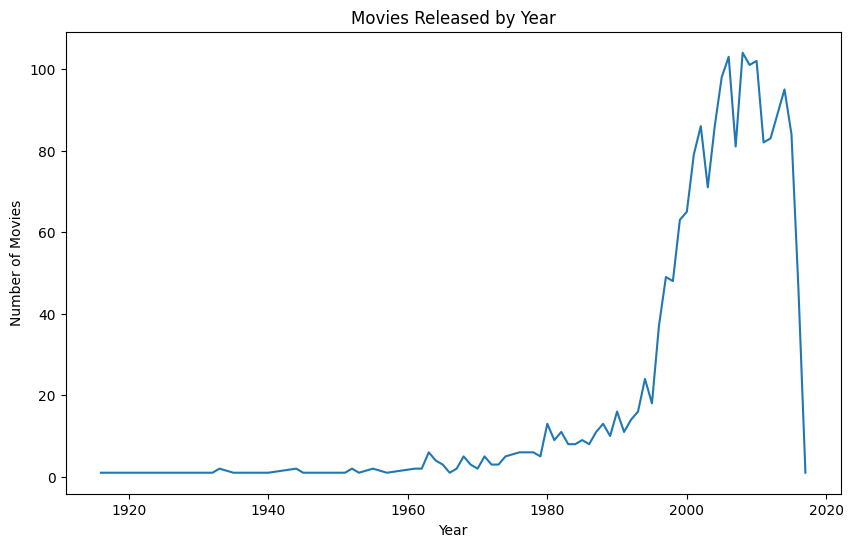

In [34]:
# Group by release year and count the number of movies
release_by_year = df.groupby('Release_Year')['Movie_ID'].count()

# Plot the number of movies released each year
release_by_year.plot(kind='line', figsize=(10, 6), title="Movies Released by Year")
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Some Questions

## `Q: What are top 2 the Famous Movie Language?`

In [35]:

df['Movie_Language'].value_counts().head(2)


Movie_Language
en    4465
fr      69
Name: count, dtype: int64

> The top two languages are English and French 

 ## `Q: Top 5 Directors with the most movies in the dataset?` 

In [36]:
top_directors = df['Movie_Director'].value_counts().head(5)
print(top_directors)


Movie_Director
Steven Spielberg    48
Woody Allen         21
Clint Eastwood      20
Martin Scorsese     19
Robert Rodriguez    16
Name: count, dtype: int64


## `Q:Which Movie Got Highest Revenue?`

In [37]:
highest_profit_movie = df.loc[df['Movie_profit'].idxmax()]

# Display the result
print(highest_profit_movie[['Movie_Title', 'Movie_Budget', 'Movie_Revenue', 'Movie_profit']])

Movie_Title          Avatar
Movie_Budget      237000000
Movie_Revenue    2787965087
Movie_profit     2550965087
Name: 2691, dtype: object


> The **Avatar** movie has the highest profit of $2,787,965,087

## `Q:Top 10 Movie Genres by Count?`

C:\Users\dell\AppData\Local\Temp\ipykernel_13256\54997807.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='pastel')


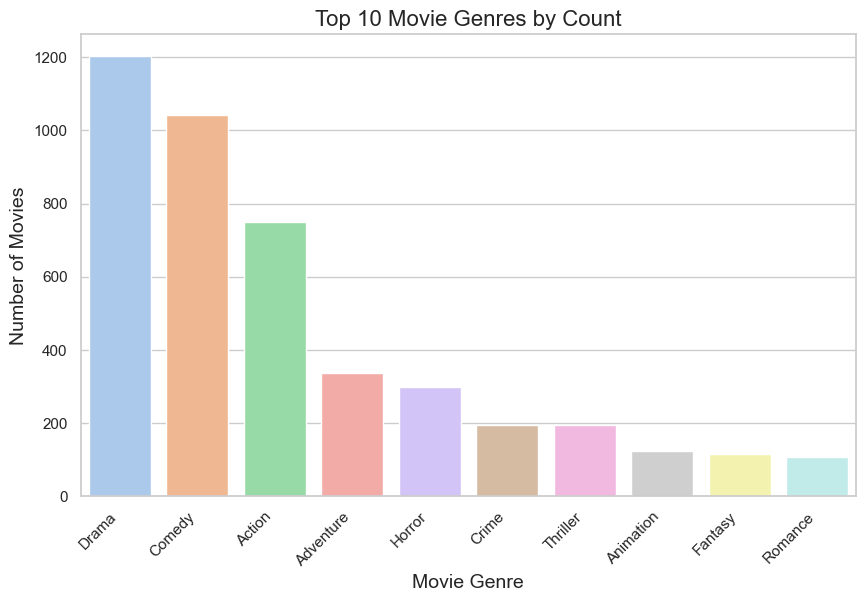

In [38]:

# Count the number of movies in each genre
genre_count = df['Movie_Genre'].value_counts()

# Get the top 10 genres
top_10_genres = genre_count.head(10)

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values, palette='pastel')

# Add titles and labels
plt.title('Top 10 Movie Genres by Count', fontsize=16)
plt.xlabel('Movie Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

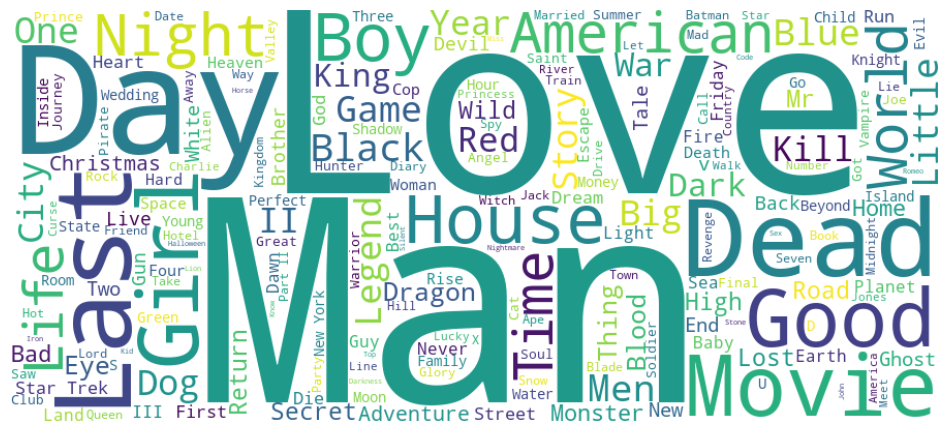

In [39]:
from wordcloud import WordCloud
# Join all movie titles into a single string
text = ' '.join(df['Movie_Title'].dropna())

# Create the word cloud object
wordcloud = WordCloud(width=900, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.show()


# **Machine Learning**

In [40]:
# import necessary libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.svm import SVC,SVR
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

> We have done some part of pre-processing it is time to encode the categorical columns

# Standardize the data 

### Before Scaling the data

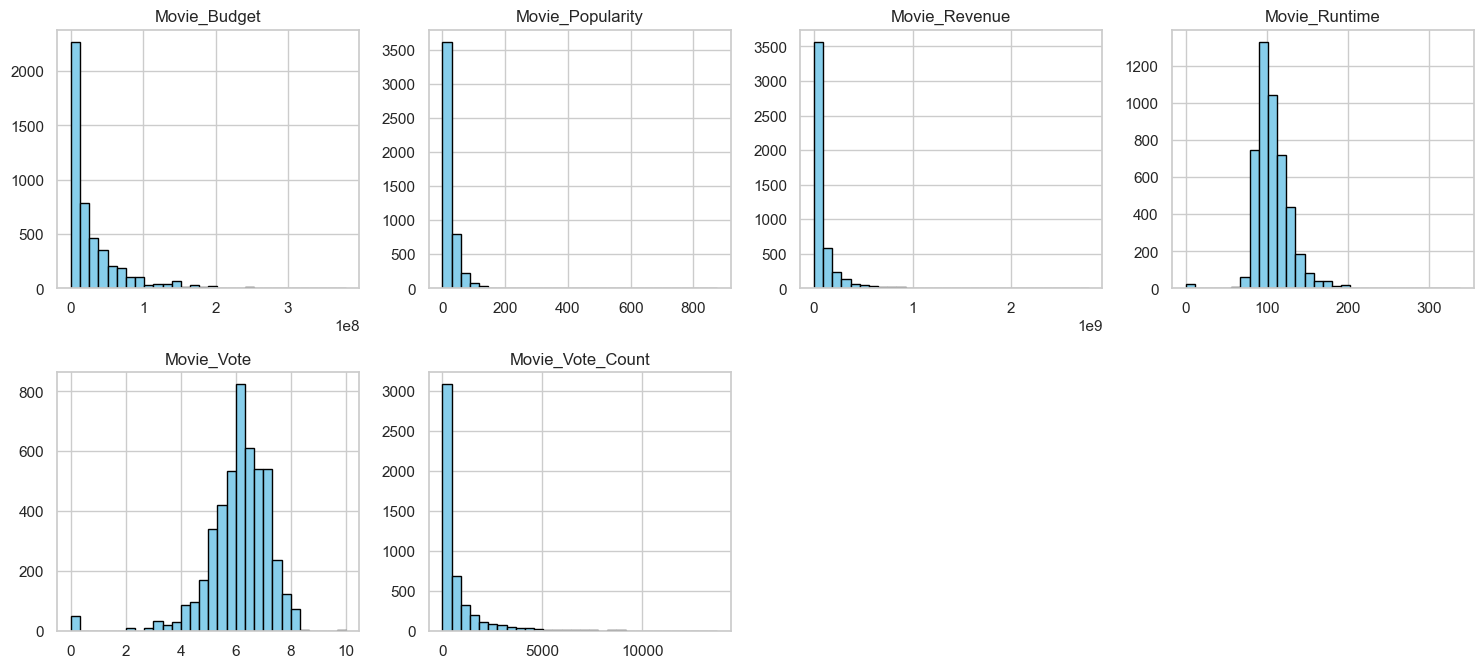

In [41]:
# check distribution of numeric columns
df[numeric_columns].hist(figsize=(15, 10), bins=30, layout=(3, 4), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Feature Encoding

In [42]:
# call the label encoder
le = LabelEncoder()
# Encode the categorical columns
# df['Movie_Genre']= le.fit_transform(df['Movie_Genre'])
df['Movie_Language']= le.fit_transform(df['Movie_Language'])
df['Movie_Genre']= le.fit_transform(df['Movie_Genre'])

In [43]:
df.head(2)

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director,Movie_Genre_List,Movie_profit,Production_Country_Name,Release_Year,Release_Month,Release_Day
0,1,Four Rooms,4,4,4000000,22.876230,1995-09-12,4300000,98.0,6.5,...,Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders,"[Crime, Comedy]",300000,United States of America,1995.0,9.0,12.0
1,2,Star Wars,1,4,11000000,126.393695,NaT,775398007,121.0,8.1,...,"A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas,"[Adventure, Action, Science, Fiction]",764398007,United States of America,NaN,NaN,NaN


In [44]:
# Let's select Features and target variable
X = df[['Movie_Language', 'Movie_Budget', 'Movie_Runtime','Movie_Popularity','Movie_Vote_Count','Movie_Genre']] 
y=df['Movie_profit']

In [45]:
X

,Movie_Language,Movie_Budget,Movie_Runtime,Movie_Popularity,Movie_Vote_Count,Movie_Genre
0,4,4000000,98.000000,22.876230,530,4
1,4,11000000,121.000000,126.393695,6624,1
2,4,94000000,100.000000,85.688789,6122,2
3,4,55000000,142.000000,138.133331,7927,3
4,4,15000000,122.000000,80.878605,3313,6
...,...,...,...,...,...,...
4755,4,8000000,94.000000,0.001389,0,11
4756,4,8000000,102.000000,0.710870,7,3
4757,4,8000000,90.000000,0.015295,0,17
4758,4,8000000,88.000000,0.028756,0,7


In [46]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# Models dictionary with hyperparameters
models = {
    "LinearRegression": (
        LinearRegression(),
        {}  # No hyperparameters to tune for basic LinearRegression
    ),
    "SVR": (
        SVR(),
        {
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    ),
    "Random Forest Regressor": (
        RandomForestRegressor(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "Knearest-neighbours": (
        KNeighborsRegressor(),
        {
            'n_neighbors': [3, 5, 7, 9, 11, 33]
        }
    ),
    "Gradient Boosting Regressor": (
        GradientBoostingRegressor(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "XGB Regressor": (
        XGBRegressor(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "DecisionTreeRegressor": (
        DecisionTreeRegressor(),
        {
            'max_depth': [None, 10, 100]
        }
    )
}

# Train and predict each model with evaluation metrics
for name, (model, params) in models.items():
    # GridSearchCV for hyperparameter tuning
    pipeline = GridSearchCV(model, params, cv=5)
    pipeline.fit(X_train, y_train)  # Fit the model
    y_pred = pipeline.predict(X_test)  # Make predictions

    # Calculate and print evaluation metrics
    mse_value = mean_squared_error(y_test, y_pred)
    r2_value = r2_score(y_test, y_pred)
    mae_value = mean_absolute_error(y_test, y_pred)

    # Print results for each model
    print(f"{name} MSE: {mse_value}")
    print(f"{name} R2: {r2_value}")
    print(f"{name} MAE: {mae_value}")
    print("-" * 50)


LinearRegression MSE: 6743717214134070.0
LinearRegression R2: 0.6050544978301097
LinearRegression MAE: 44058614.65140886
--------------------------------------------------
SVR MSE: 1.9430135191110936e+16
SVR R2: -0.13792501325510131
SVR MAE: 61049853.6584884
--------------------------------------------------
Random Forest Regressor MSE: 6623834601321909.0
Random Forest Regressor R2: 0.612075417779022
Random Forest Regressor MAE: 39298575.762394965
--------------------------------------------------
Knearest-neighbours MSE: 1.0193782293453968e+16
Knearest-neighbours R2: 0.40300158813588793
Knearest-neighbours MAE: 47520448.30392157
--------------------------------------------------
Gradient Boosting Regressor MSE: 7009277237180692.0
Gradient Boosting Regressor R2: 0.5895019867552717
Gradient Boosting Regressor MAE: 39841355.13059679
--------------------------------------------------
XGB Regressor MSE: 6593259593793536.0
XGB Regressor R2: 0.6138660311698914
XGB Regressor MAE: 38767772.0
-

# Classification

In [ ]:
# Let's select Features and target variable
X = df[['Movie_Language', 'Movie_Budget', 'Movie_Runtime','Movie_Popularity','Movie_Vote_Count','Movie_profit']] 
y=df['Movie_Genre']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Models dictionary with hyperparameters
models = {
    "Logistic Regression": (
        LogisticRegression(),
        {}  # No hyperparameters to tune for basic LogisticRegression
    ),
    "SVM": (
        SVC(),
        {
            'kernel': ['rbf', 'poly', 'sigmoid']
        }
    ),
    "Random Forest Classifier": (
        RandomForestClassifier(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "Knearest-neighbours": (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9, 11, 33]
        }
    ),
    "Gradient Boosting Classifier": (
        GradientBoostingClassifier(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "XGB Classifier": (
        XGBClassifier(),
        {
            'n_estimators': [10, 100]
        }
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {
            'max_depth': [None, 10, 100]
        }
    )
}

# Train and predict each model with evaluation metrics
for name, (model, params) in models.items():
    # GridSearchCV for hyperparameter tuning
    pipeline = GridSearchCV(model, params, cv=5)
    pipeline.fit(X_train, y_train)  # Fit the model
    y_pred = pipeline.predict(X_test)  # Make predictions

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)

    # Print results for each model
    print(f"{name} Accuracy: {accuracy}")
    print("-" * 50)

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number 

Logistic Regression Accuracy: 0.15231092436974789
--------------------------------------------------
